## Dataframe 数据选择方法

- 将DataFrame看做字典

  * 第一种类比是把DataFrame当作一个由若干Series对象构成的字典

In [19]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                          'New York': 141297, 'Florida': 170312,
                          'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [2]:
# 两个Series分别构成DataFrame的一列，可以通过对列名进行字典形式（dictionary-style）的取值获取数据：

data["area"]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [3]:
# 同样，也可以用属性形式（attribute-style）选择纯字符串列名的数据

data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [4]:
# 虽然属性形式的数据选择方法很方便，但是它并不是通用的。如果列名不是纯字符串，或者列名与DataFrame的方法同名，那么就不能用属性索引。例如，DataFrame有一个pop()方法，如果用data.pop就不会获取'pop'列，而是显示为方法

data.pop is data["pop"]

False

In [17]:
# 赋值时注意事项

data["pop"][0] = 12345
data

,area,pop
California,423967,12345
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [20]:
import pandas as pd

data["density"] = data["pop"]/data["area"]
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 2. 将DataFrame看作二维数组

- 前面曾提到，可以把DataFrame看成是一个增强版的二维数组，用values属性按行查看数组数据：

In [21]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [22]:
# 理解了这一点，就可以把许多数组操作方式用在DataFrame上。例如，可以对DataFrame进行行列转置：

data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [23]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [24]:
data["area"]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
#因此，在进行数组形式的取值时，我们就需要用另一种方法——前面介绍过的Pandas索引器loc、iloc和ix了。通过iloc索引器，我们就可以像对待NumPy数组一样索引Pandas的底层数组（Python的隐式索引），DataFrame的行列标签会自动保留在结果中：

data.iloc[:3,:2] # 右边是一个开区间

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [26]:
data.loc[:"Illinois",:"pop"] #右边是一个闭区间

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [27]:
# 任何用于处理NumPy形式数据的方法都可以用于这些索引器。例如，可以在loc索引器中结合使用掩码与花哨的索引方法：

import pandas as pd
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [28]:
# 任何一种取值方法都可以用于调整数据，这一点和NumPy的常用方法是相同的

data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 其他取值方法

- 还有一些取值方法和前面介绍过的方法不太一样。它们虽然看着有点奇怪，但是在实践中还是很好用的。首先，如果对单个标签取值就选择列，而对多个标签用切片就选择行


### 可以输入给DataFrame构造器的数据

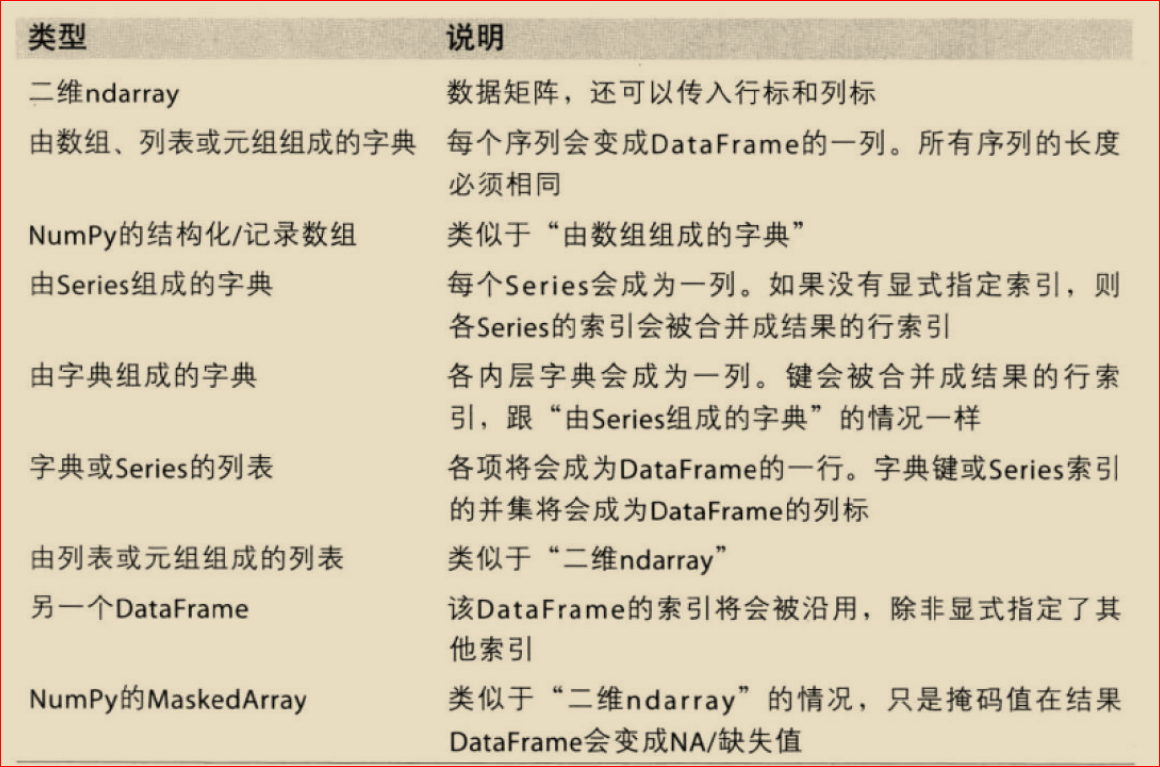

### 标签Index

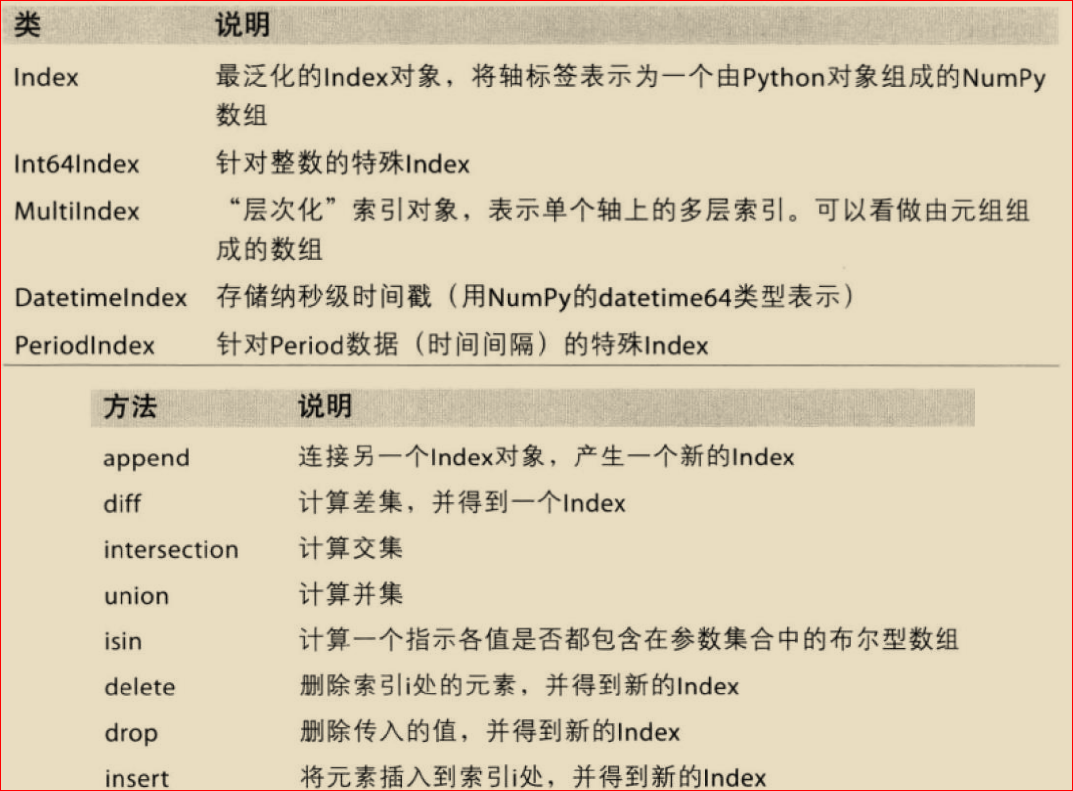

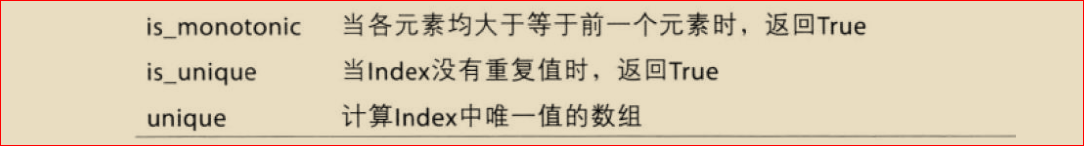

In [29]:
data["Florida":"Illinois"]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [30]:
# 切片也可以不用索引值，直接使用行数实现
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


### pandas 数值运算方法

- NumPy的基本能力之一是快速对每个元素进行运算，既包括基本算术运算（加、减、乘、除），也包括更复杂的运算（三角函数、指数函数和对数函数等）。Pandas继承了NumPy的功能。

- 但是Pandas也实现了一些高效技巧：对于一元运算（像函数与三角函数），这些通用函数将在输出结果中保留索引和列标签；而对于二元运算（如加法和乘法），Pandas在传递通用函数时会自动对齐索引进行计算。这就意味着，保存数据内容与组合不同来源的数据——两处在NumPy数组中都容易出错的地方——变成了Pandas的杀手锏。后面还会介绍一些关于一维Series和二维DataFrame的便捷运算方法

####  通用函数：保留索引

- 因为Pandas是建立在NumPy基础之上的，所以NumPy的通用函数同样适用于Pandas的Series和DataFrame对象

In [1]:
import pandas as pd 
import numpy as np
rng = np.random.RandomState(42)
ser=pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [2]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),columns=["A","B","C","D"])

df

# 如果对这两个对象的其中一个使用NumPy通用函数，生成的结果是另一个保留索引的 Pandas对象：

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [3]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [4]:
# 或者再做一个比较复杂的运算：

np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### 通用函数：索引对齐 

- 当在两个Series或DataFrame对象上进行二元计算时，Pandas会在计算过程中对齐两个对象的索引。当你处理不完整的数据时，这一点非常方便，我们将在后面的示例中看到。

In [5]:
# Series 索引对齐

# 来看一个例子，假如你要整合两个数据源的数据，
# 其中一个是美国面积最大的三个州的面积数据，
# 另一个是美国人口最多的三个州的人口数据：

import pandas as pd
import numpy as np

area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                    'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                         'New York': 19651127}, name='population')
population/area
# 结果数组的索引是两个输入数组索引的并集。我们也可以用Python标准库的集合运算法则来获得这个索引：

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

- 对于缺失位置的数据，Pandas会用NaN填充，表示“此处无数”。这是Pandas表示缺失值的方法（详情请参见3.5节关于缺失值的介绍）。这种索引对齐方式是通过Python内置的集合运算规则实现的，任何缺失值默认都用NaN填充

In [7]:
area.index|population.index
# 相当于求并集

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [8]:
A = pd.Series([2,4,6],index=[0,1,2])
B = pd.Series([1,3,5],index=[1,2,3])
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [10]:
# 如果用NaN值不是我们想要的结果，那么可以用适当的对象方法代替运算符。例如，A.add(B)等价于A + B，也可以设置参数自定义A或B缺失的数据：

A.add(B,fill_value=0)
# 自定义A、B缺省的数据用0代替

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [13]:
# 2. DataFrame索引对齐
# 在计算两个DataFrame时，类似的索引对齐规则也同样会出现在共同（并集）列中：
A = pd.DataFrame(rng.randint(0,20,(2,2)),columns=list("AB"))
A

,A,B
0,1,11
1,5,1


In [14]:
B=pd.DataFrame(rng.randint(0,10,(3,3)),columns=list("ABC"))
B

,A,B,C
0,4,0,9
1,5,8,0
2,9,2,6


In [15]:
A+B
# 两个对象的行列索引可以是不同顺序的，结果的索引会自动按顺序排列。

,A,B,C
0,5.0,11.0,NaN
1,10.0,9.0,NaN
2,NaN,NaN,NaN


In [16]:
# 在Series中，我们可以通过运算符方法的fill_value参数自定义缺失值。
# 这里，我们将用A中所有值的均值来填充缺失值（计算A的均值需要用stack将二维数组压缩成一维数组）

fill = A.stack().mean()
A.add(B,fill_value=fill)

,A,B,C
0,5.0,11.0,13.5
1,10.0,9.0,4.5
2,13.5,6.5,10.5


### Python运算符相对应的Pandas对象方法的映射关系

![001 映射关系](./media/python运算符与pandas方法映射关系.PNG)

## 通用函数：DataFrame与Series的运算

- 我们经常需要对一个DataFrame和一个Series进行计算，行列对齐方式与之前类似。也就是说，DataFrame和Series的运算规则，与NumPy中二维数组与一维数组的运算规则是一样的。来看一个常见运算，让一个二维数组减去自身的一行数据：

In [17]:
A = rng.randint(10,size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [18]:
A - A[0]

# 根据NumPy的广播规则（详情请参见2.5节），让二维数组减自身的一行数据会按行计算。


array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [27]:
A[:,0]

array([3, 2, 6])

In [28]:
import pandas as pd
import numpy as np
df = pd.DataFrame(A,columns=list("QRST"))
df-df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [29]:
# 如果你想按列计算，那么就需要利用前面介绍过的运算符方法，通过axis参数设置

df.subtract(df["R"],axis=0)
# 各列分别减去R列的数值

#你会发现DataFrame/Series的运算与前面介绍的运算一样，结果的索引都会自动对齐

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [30]:
halfrow = df.iloc[0,::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [31]:
df - halfrow

# 这些行列索引的保留与对齐方法说明Pandas在运算时会一直保存这些数据内容，从而避免在处理数据类型有差异和 / 
# 或维度不一致的NumPy数组时可能遇到的问题。

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN
